<a href="https://colab.research.google.com/github/amyrhuerta/Valores-Atipicos/blob/main/valores_at%C3%ADpicos_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Valores_atípicos_DataFrame**

Amairany Rodríguez | A01702927

## GASTOS Y COSTOS 2020

In [ ]:
data= pd.read_excel('Gastos y costos 20-23.xlsx', skiprows=5, sheet_name='2020') 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64

In [ ]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =data.fillna(method="bfill") 

In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

FECHA             0
FOLIO             0
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO             0
DESCRIPCION       0
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2898
Columna1          0
dtype: int64

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
data2=data.copy()
data2=data2.fillna(round(data.mean(),1))

<ipython-input-273-f0a59ba6bc4f>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2=data2.fillna(round(data.mean(),1))
<ipython-input-273-f0a59ba6bc4f>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2=data2.fillna(round(data.mean(),1))


In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64

<Figure size 1500x800 with 0 Axes>

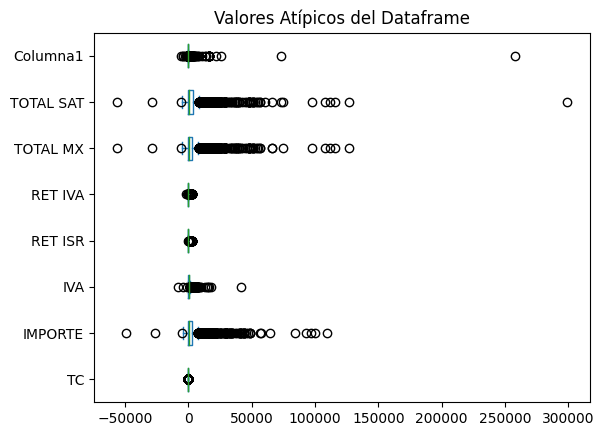

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Eliminamos columnas innecesarias
data4= data2.drop(['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'GASTO', 'DESCRIPCION', 'TIPO', 'STATUS', 'POLIZA'], axis=1)
data4

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data4
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               4.251032
IMPORTE      25167.992859
IVA           4563.165637
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
Columna1     14626.999268
dtype: float64
Limite inferior permitido TC              -2.117814
IMPORTE     -18869.298785
IVA          -3523.520012
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
Columna1    -14171.411134
dtype: float64


In [ ]:
#Encontramos Ouliers del Dataframe
outliers= data4[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= data4[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [ ]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

TC            9
IMPORTE      67
IVA          58
RET ISR      21
RET IVA      74
TOTAL MX     65
TOTAL SAT    45
Columna1     15
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64

In [ ]:
datos_obj=data2[['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'GASTO', 'DESCRIPCION', 'TIPO', 'STATUS', 'POLIZA']]
Datos_limpios = pd.concat([datos_obj, data_clean], axis=1)
Datos_limpios.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,NaN,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,NaN,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,NaN,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,P,Vigente,NaN,1.0,0.00,519.80,0.0,0.0,0.00,0.00,0.00


In [ ]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("GASTOS Y COSTOS 2020 DESVIACIÓN ESTÁNDAR.csv")

#descargar archivo filtrado en csv
from google.colab import files 
files.download("GASTOS Y COSTOS 2020 DESVIACIÓN ESTÁNDAR.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data4

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC              1.00000
IMPORTE      7492.26375
IVA          1280.63375
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     7983.17750
TOTAL SAT    8269.28375
Columna1        0.00000
dtype: float64
Limite inferior permitido TC              1.00000
IMPORTE     -4465.00625
IVA          -748.25625
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4783.14250
TOTAL SAT   -4832.96625
Columna1        0.00000
dtype: float64


In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr= data4[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,NaN,NaN,2248.28,NaN,NaN,NaN,16300.00,14051.72
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10694.25,1711.08,NaN,NaN,12405.33,12405.33,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr= data4[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,NaN,0.0,0.0,2248.28,NaN,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

TC           400
IMPORTE      400
IVA          347
RET ISR       45
RET IVA      253
TOTAL MX     420
TOTAL SAT    426
Columna1     240
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data3_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data3_iqr.mean(),1))
data5_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,222.20,0.0,0.0,2248.28,1333.00,0.0
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,1162.50,222.20,0.0,0.0,1239.10,1333.00,0.0
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [ ]:
# Unimos la columna 'indice_tiempo' con el dataframe
datos_obj=data2[['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'GASTO', 'DESCRIPCION', 'TIPO', 'STATUS', 'POLIZA']]
Datos_limpios = pd.concat([datos_obj, data5_iqr], axis=1)
Datos_limpios.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,NaN,1.0,0.0,222.2,0.0,0.0,2248.28,1333.0,0.0
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,NaN,1.0,490.0,78.4,0.0,0.0,568.40,568.4,0.0
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,NaN,1.0,195.0,31.2,0.0,0.0,226.20,226.2,0.0
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,NaN,1.0,1162.5,222.2,0.0,0.0,1239.10,1333.0,0.0
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,P,Vigente,NaN,1.0,0.0,519.8,0.0,0.0,0.00,0.0,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TIPO              1
STATUS            0
POLIZA         3321
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
Columna1          0
dtype: int64

In [ ]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("GASTOS Y COSTOS 2020 quantiles.csv")

#descargar archivo filtrado en csv
from google.colab import files 
files.download("GASTOS Y COSTOS 2020 quantiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## GASTOS Y COSTOS 2021

In [ ]:
data= pd.read_excel('Gastos y costos 20-23.xlsx', skiprows=3, sheet_name='2021') 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64

In [ ]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =data.fillna(method="bfill") 

In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         6
dtype: int64

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
data2=data.copy()
data2=data2.fillna(round(data.mean(),1))

<ipython-input-299-f0a59ba6bc4f>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2=data2.fillna(round(data.mean(),1))
<ipython-input-299-f0a59ba6bc4f>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2=data2.fillna(round(data.mean(),1))


In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64

<Figure size 1500x800 with 0 Axes>

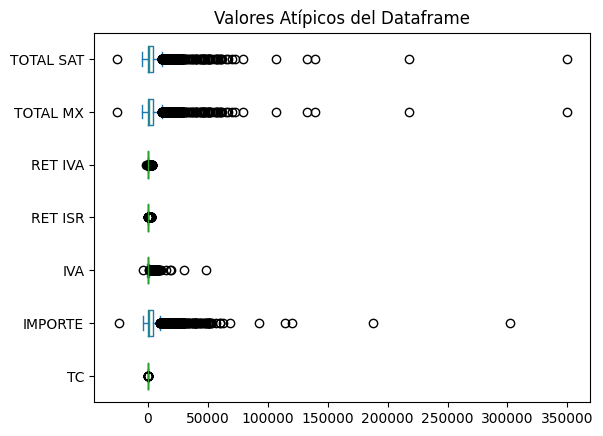

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Eliminamos columnas innecesarias
data4= data2.drop(['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'DESCRIPCION', 'MP', 'TIPO', 'STATUS', 'POLIZA'], axis=1)
data4

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data4
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               6.286851
IMPORTE      36154.569820
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: float64
Limite inferior permitido TC              -3.981398
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TOTAL MX    -31176.694132
TOTAL SAT   -31129.503410
dtype: float64


In [ ]:
#Encontramos Ouliers del Dataframe
outliers= data4[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= data4[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [ ]:
#Corroboramos valores nulos del dataframe3
valores_nulos=data3.isnull().sum()
valores_nulos

TC           24
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [ ]:
# Unimos la columna 'indice_tiempo' con el dataframe
datos_obj=data2[['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'DESCRIPCION', 'MP', 'TIPO', 'STATUS', 'POLIZA']]
Datos_limpios = pd.concat([datos_obj, data_clean], axis=1)
Datos_limpios.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [ ]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("GASTOS Y COSTOS 2021 DESVIACIÓN ESTÁNDAR.csv")

#descargar archivo filtrado en csv
from google.colab import files 
files.download("GASTOS Y COSTOS 2021 DESVIACIÓN ESTÁNDAR.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data4

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.0000
IMPORTE      10127.7125
IVA           1381.4750
RET ISR          0.0000
RET IVA          0.0000
TOTAL MX     11580.2750
TOTAL SAT    11456.0225
dtype: float64
Limite inferior permitido TC              1.0000
IMPORTE     -6076.6275
IVA          -828.8850
RET ISR         0.0000
RET IVA         0.0000
TOTAL MX    -6948.1650
TOTAL SAT   -6818.3175
dtype: float64


In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr= data4[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaN,22826.46,NaN,NaN,NaN,23532.04,23532.04
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr= data4[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3031,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3032,1.0,NaN,705.58,0.0,0.0,NaN,NaN
3033,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

TC            24
IMPORTE      336
IVA          342
RET ISR       56
RET IVA      212
TOTAL MX     347
TOTAL SAT    351
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data3_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data3_iqr.mean(),1))
data5_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3031,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3032,1.0,1699.50,705.58,0.0,0.0,1903.4,1910.9
3033,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
# Unimos la columna 'indice_tiempo' con el dataframe
datos_obj=data2[['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'DESCRIPCION', 'MP', 'TIPO', 'STATUS', 'POLIZA']]
Datos_limpios = pd.concat([datos_obj, data5_iqr], axis=1)
Datos_limpios.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TIPO              0
STATUS            0
POLIZA         2372
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
dtype: int64

In [ ]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("GASTOS Y COSTOS 2021 quantiles.csv")

#descargar archivo filtrado en csv
from google.colab import files 
files.download("GASTOS Y COSTOS 2021 quantiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## GASTOS Y COSTOS 2022

In [ ]:
data= pd.read_excel('Gastos y costos 20-23.xlsx', skiprows=3, sheet_name='2022') 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC              636
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64

In [ ]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =data.fillna(method="bfill") 

In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

Fecha             0
Folio             0
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP                3
TC                3
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza           12
dtype: int64

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
data2=data.copy()
data2=data2.fillna(round(data.mean(),1))

<ipython-input-324-f0a59ba6bc4f>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2=data2.fillna(round(data.mean(),1))
<ipython-input-324-f0a59ba6bc4f>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2=data2.fillna(round(data.mean(),1))


In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC                0
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64

<Figure size 1500x800 with 0 Axes>

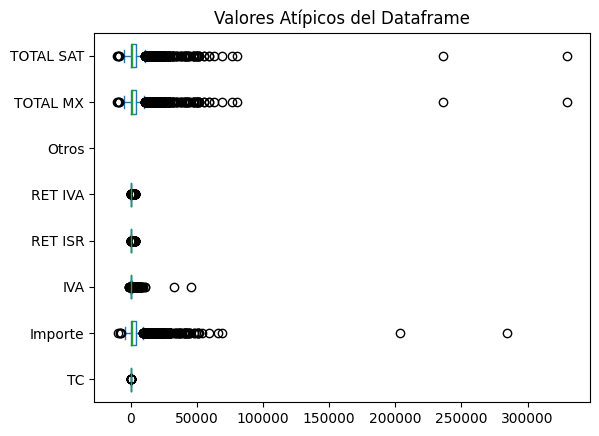

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Eliminamos columnas innecesarias
data4= data2.drop(['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 'Status', 'Poliza'], axis=1)
data4

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,NaN,17826.62,17826.62
2574,1.2,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2575,1.2,0.00,0.00,0.0,0.0,NaN,0.00,0.00


In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data4
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               5.984644
Importe      34975.501132
IVA           5048.646001
RET ISR        977.619941
RET IVA       1046.847384
Otros                 NaN
TOTAL MX     39054.094273
TOTAL SAT    39095.543969
dtype: float64
Limite inferior permitido TC              -3.617294
Importe     -26990.441616
IVA          -4069.819702
RET ISR       -902.558225
RET IVA       -964.592475
Otros                 NaN
TOTAL MX    -30247.525081
TOTAL SAT   -30172.959879
dtype: float64


In [ ]:
#Encontramos Ouliers del Dataframe
outliers= data4[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= data4[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,NaN,17826.62,17826.62
2574,1.2,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2575,1.2,0.00,0.00,0.0,0.0,NaN,0.00,0.00


In [ ]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

TC             18
Importe        36
IVA            31
RET ISR        32
RET IVA        32
Otros        2577
TOTAL MX       36
TOTAL SAT      36
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,NaN,17826.62,17826.62
2574,1.2,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2575,1.2,0.00,0.00,0.0,0.0,NaN,0.00,0.00


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC              0
Importe         0
IVA             0
RET ISR         0
RET IVA         0
Otros        2577
TOTAL MX        0
TOTAL SAT       0
dtype: int64

In [ ]:
# Unimos la columna 'indice_tiempo' con el dataframe
datos_obj=data2[['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 'Status', 'Poliza']]
Datos_limpios = pd.concat([datos_obj, data_clean], axis=1)
Datos_limpios.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,P,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,P,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0


In [ ]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("GASTOS Y COSTOS 2022 DESVIACIÓN ESTÁNDAR.csv")

#descargar archivo filtrado en csv
from google.colab import files 
files.download("GASTOS Y COSTOS 2022 DESVIACIÓN ESTÁNDAR.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data4

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.500
Importe       9058.900
IVA           1031.150
RET ISR          0.000
RET IVA          0.000
Otros              NaN
TOTAL MX     10374.700
TOTAL SAT    10485.475
dtype: float64
Limite inferior permitido TC              0.700
Importe     -5435.340
IVA          -618.690
RET ISR         0.000
RET IVA         0.000
Otros             NaN
TOTAL MX    -6224.820
TOTAL SAT   -6291.285
dtype: float64


In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr= data4[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaN,17310.3,NaN,NaN,NaN,NaN,17826.62,17826.62
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr= data4[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
2573,1.0,NaN,516.32,0.0,0.0,NaN,NaN,NaN
2574,1.2,0.00,0.00,0.0,0.0,NaN,0.0,0.0
2575,1.2,0.00,0.00,0.0,0.0,NaN,0.0,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

TC             18
Importe       305
IVA           303
RET ISR        71
RET IVA        70
Otros        2577
TOTAL MX      291
TOTAL SAT     288
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data3_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data3_iqr.mean(),1))
data5_iqr

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
2573,1.0,1449.20,516.32,0.0,0.0,NaN,1711.5,1782.0
2574,1.2,0.00,0.00,0.0,0.0,NaN,0.0,0.0
2575,1.2,0.00,0.00,0.0,0.0,NaN,0.0,0.0


In [ ]:
# Unimos la columna 'indice_tiempo' con el dataframe
datos_obj=data2[['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 'Status', 'Poliza']]
Datos_limpios = pd.concat([datos_obj, data5_iqr], axis=1)
Datos_limpios.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,P,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,P,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
Tipo              0
Status            0
Poliza          801
TC                0
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
dtype: int64

In [ ]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("GASTOS Y COSTOS 2022 quantiles.csv")

#descargar archivo filtrado en csv
from google.colab import files 
files.download("GASTOS Y COSTOS 2022 quantiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## GASTOS Y COSTOS 2023

In [ ]:
data= pd.read_excel('Gastos y costos 20-23.xlsx', skiprows=3, sheet_name='2023') 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

In [ ]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =data.fillna(method="bfill") 

In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

Fecha            0
Folio            0
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       0
Descripción      0
MP               1
FP               1
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza           8
dtype: int64

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
data2=data.copy()
data2=data2.fillna(round(data.mean(),1))

<ipython-input-349-f0a59ba6bc4f>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2=data2.fillna(round(data.mean(),1))
<ipython-input-349-f0a59ba6bc4f>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2=data2.fillna(round(data.mean(),1))


In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP               0
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

<Figure size 1500x800 with 0 Axes>

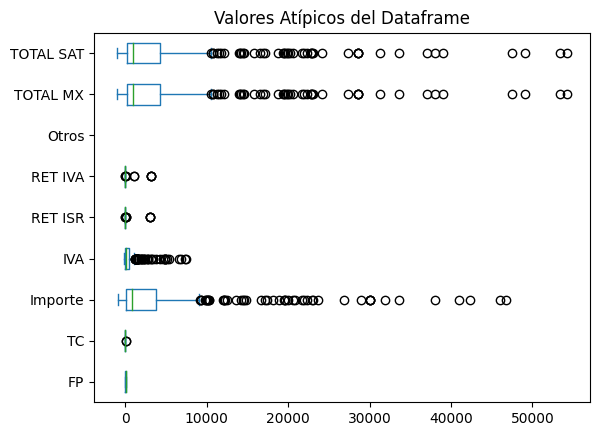

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Eliminamos columnas innecesarias
data4= data2.drop(['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 'Status', 'Poliza'], axis=1)
data4

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
1,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,NaN,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,NaN,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,NaN,14472.32,14472.32


In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data4
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP             173.384206
TC               4.957143
Importe      26557.244156
IVA           3761.774707
RET ISR        931.175004
RET IVA       1022.471745
Otros                 NaN
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: float64
Limite inferior permitido FP             -85.384206
TC              -2.774030
Importe     -18708.366775
IVA          -2766.954304
RET ISR       -869.142712
RET IVA       -947.124289
Otros                 NaN
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: float64


In [ ]:
#Encontramos Ouliers del Dataframe
outliers= data4[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= data4[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
1,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,NaN,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,NaN,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,NaN,14472.32,14472.32


In [ ]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

FP             0
TC             2
Importe       13
IVA           13
RET ISR        4
RET IVA        6
Otros        397
TOTAL MX       9
TOTAL SAT      9
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
1,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,NaN,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,NaN,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,NaN,14472.32,14472.32


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros        397
TOTAL MX       0
TOTAL SAT      0
dtype: int64

In [ ]:
# Unimos la columna 'indice_tiempo' con el dataframe
datos_obj=data2[['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 'Status', 'Poliza']]
Datos_limpios = pd.concat([datos_obj, data_clean], axis=1)
Datos_limpios.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,P,Vigente,NaN,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,P,Vigente,NaN,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07


In [ ]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("GASTOS Y COSTOS 2023 DESVIACIÓN ESTÁNDAR.csv")

#descargar archivo filtrado en csv
from google.colab import files 
files.download("GASTOS Y COSTOS 2023 DESVIACIÓN ESTÁNDAR.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data4

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido FP             243.00
TC               1.00
Importe       9075.43
IVA           1120.00
RET ISR          0.00
RET IVA          0.00
Otros             NaN
TOTAL MX     10527.50
TOTAL SAT    10527.50
dtype: float64
Limite inferior permitido FP           -141.00
TC              1.00
Importe     -5259.05
IVA          -672.00
RET ISR         0.00
RET IVA         0.00
Otros            NaN
TOTAL MX    -6100.50
TOTAL SAT   -6100.50
dtype: float64


In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr= data4[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1352.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,18071.52,NaN,NaN,NaN,NaN,18753.92,18753.92
395,NaN,NaN,14472.32,NaN,NaN,NaN,NaN,14472.32,14472.32


In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr= data4[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
1,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
4,99.0,1.0,8454.37,NaN,0.0,0.0,NaN,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,NaN,220.00,220.00
394,3.0,1.0,NaN,682.40,0.0,0.0,NaN,NaN,NaN
395,5.0,1.0,NaN,0.00,0.0,0.0,NaN,NaN,NaN


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

FP             0
TC             2
Importe       50
IVA           49
RET ISR        9
RET IVA        9
Otros        397
TOTAL MX      46
TOTAL SAT     46
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data3_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data3_iqr.mean(),1))
data5_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
1,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
4,99.0,1.0,8454.37,176.80,0.0,0.0,NaN,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,NaN,220.00,220.00
394,3.0,1.0,1521.50,682.40,0.0,0.0,NaN,1845.00,1845.00
395,5.0,1.0,1521.50,0.00,0.0,0.0,NaN,1845.00,1845.00


In [ ]:
# Unimos la columna 'indice_tiempo' con el dataframe
datos_obj=data2[['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 'Status', 'Poliza']]
Datos_limpios = pd.concat([datos_obj, data5_iqr], axis=1)
Datos_limpios.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,P,Vigente,NaN,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,P,Vigente,NaN,44.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,176.80,0.0,0.0,NaN,9807.07,9807.07


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
Tipo             0
Status           0
Poliza         115
FP               0
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
dtype: int64

In [ ]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("GASTOS Y COSTOS 2023 quantiles.csv")

#descargar archivo filtrado en csv
from google.colab import files 
files.download("GASTOS Y COSTOS 2023 quantiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>